## Titanic: Machine Learning from Disaster

**The objectives of this competition: In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc)**

The prediction for which passengers survived the Titanic shipwreck looks like a case of predicting discrete variables. Yes or No, 1 or 0. This is apparently a classification problem.

In [1]:
# Imported the python and machine learning modules
# for data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# for visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning algorithms for classification
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

**Load the dataset**

In [2]:
# Previewing the first 5 rows of the training dataset
titanicTrainingData = pd.read_csv('train.csv')
titanicTrainingData.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Previewing the last 5 rows of the training dataset
titanicTrainingData.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [4]:
# Previewing the first 5 rows of the test dataset
titanicTestData = pd.read_csv('test.csv')
titanicTestData.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
# Previewing the last 5 rows of test dataset
titanicTestData.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [6]:
# combine both train and test
#combinedDataset = [titanicTrainingData, titanicTestData]

**Features available in the dataset**

In [7]:
print(titanicTrainingData.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


**Which features are categorical and or numerical?**

In [8]:
titanicTrainingData.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

**Pandas dataframe.info() function is used to get a concise summary of the dataframe. It comes really handy when doing exploratory analysis of the data. To get a quick overview of the dataset**

In [9]:
titanicTrainingData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
titanicTestData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [11]:
titanicTrainingData.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**I decided to look at the target variable**

**I want to know the distribution of the target variable**

**I think there's a need to understand the distribution of the target variable with regards to the sex of the survivors before moving into analyzing the categorical and numerical variables** 

In [12]:
titanicSurvived = titanicTrainingData[['Survived', 'Sex']]
titanicSurvived.shape

(891, 2)

**I plotted a horizontal bar chart to get a better understanding** 

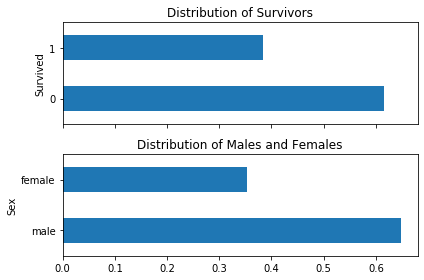

In [13]:
fig, ax = plt.subplots(2, 1, sharex=True)

dist_target = titanicSurvived.shape[0]

(titanicTrainingData['Survived']
    .value_counts()
    .div(dist_target)
    .plot.barh(title="Distribution of Survivors", ax=ax[0])
)
ax[0].set_ylabel("Survived")

(titanicTrainingData['Sex']
    .value_counts()
    .div(dist_target)
    .plot.barh(title="Distribution of Males and Females", ax=ax[1])
)
ax[1].set_ylabel("Sex")


fig.tight_layout()

**My observations from the chart**

*1. In the training dataset, an estimated 40% of passengers survived the mishap*

*2. Of the estimated 40%, female survivors make up more than 60%, males less than 40%*

*3. Why do we have more female survivors than males? Is that a relevant question?*

*4. Should this be taken into consideration as I proceed?*

**I think I'll plot more charts to understand the relationships between the target variable(Survived) and other independent variables.**

**By doing this, I think I'll definitely hit some snags that will inform data processing**

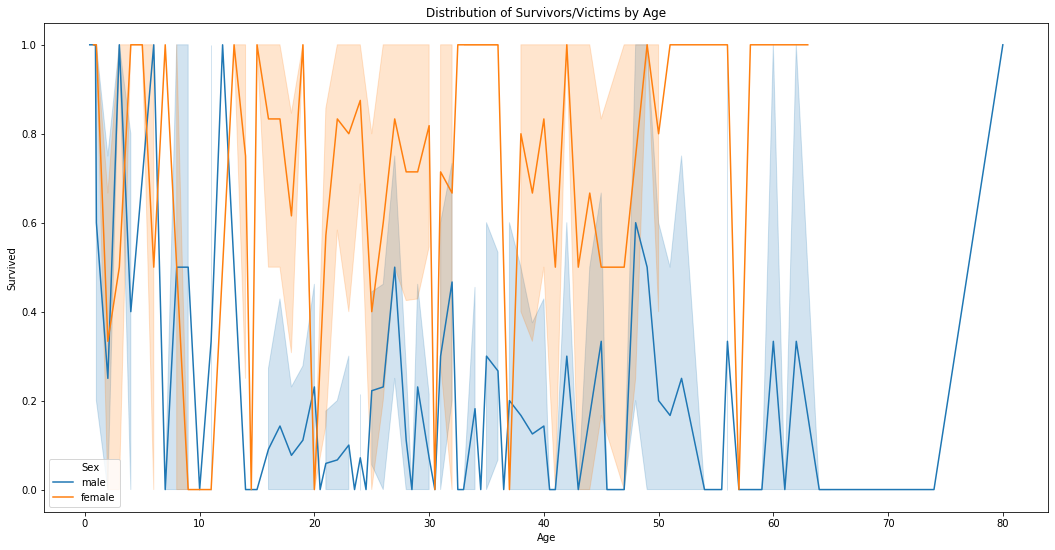

In [14]:
plt.figure(figsize=(18,9)) 

sns.lineplot(x = 'Age', y = 'Survived', hue = 'Sex', data = titanicTrainingData)
plt.title("Distribution of Survivors/Victims by Age")
plt.show()

**Observations**

*1. I think age plays a major factor in the survival numbers. A lot of the female survivors are within the Age group 3 - 48 yrs*

*2. I think the motto for helping people to safety was "women and children"*

*3. A good number of men who survived where the elderly*

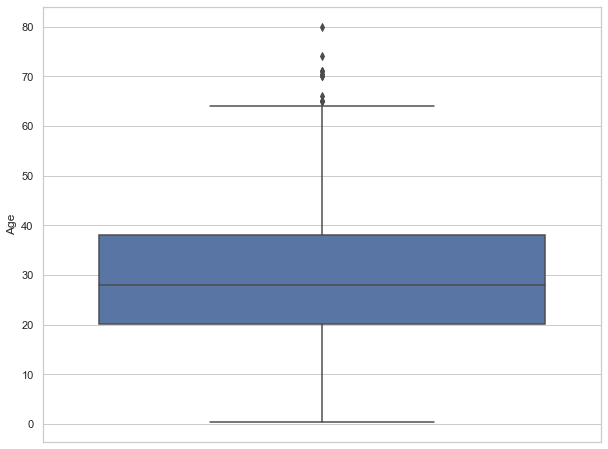

In [15]:
sns.set(style="whitegrid")
plt.figure(figsize=(10,8))
ax = sns.boxplot(x='Age', data=titanicTrainingData, orient="v")

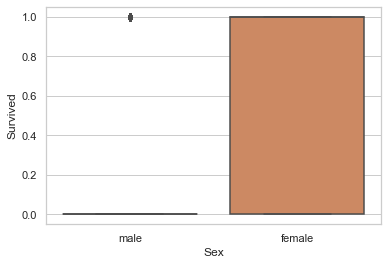

In [16]:
ax = sns.boxplot(x='Sex', y='Survived', data=titanicTrainingData, orient="v")

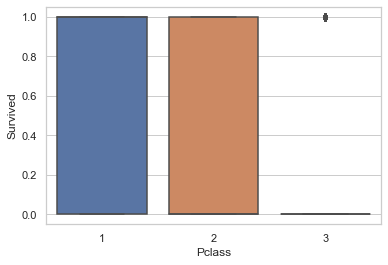

In [17]:
ax = sns.boxplot(x='Pclass', y='Survived', data=titanicTrainingData, orient="v")

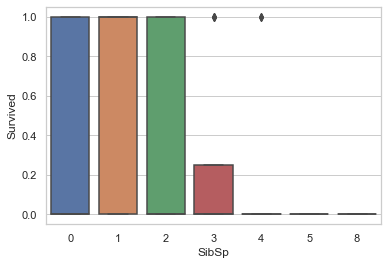

In [18]:
ax = sns.boxplot(x='SibSp', y='Survived', data=titanicTrainingData, orient="v")

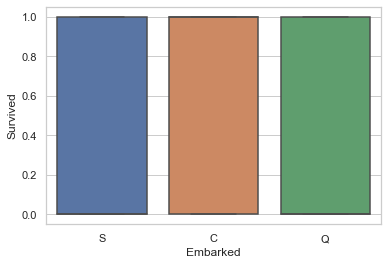

In [19]:
ax = sns.boxplot(x='Embarked', y='Survived', data=titanicTrainingData, orient="v")

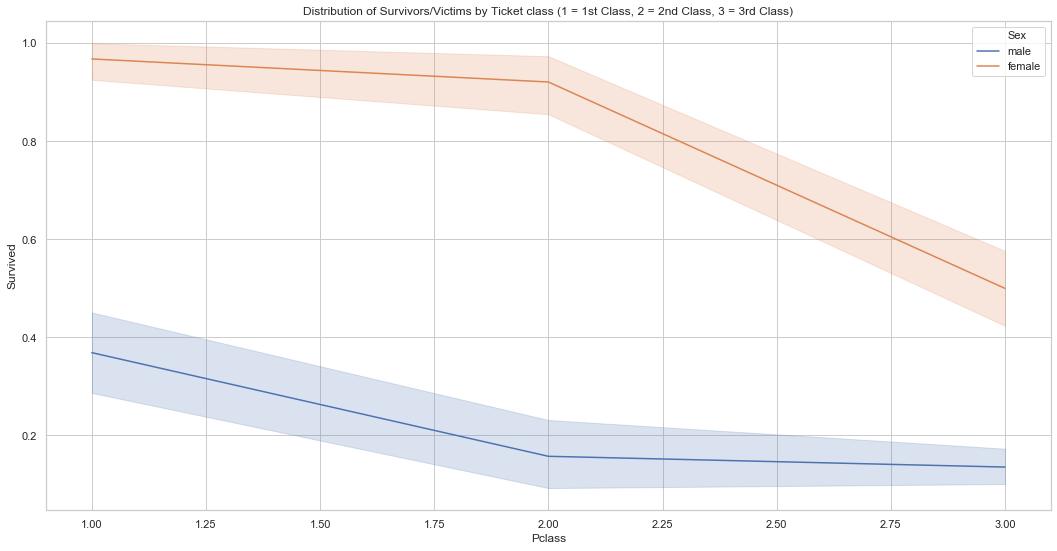

In [20]:
plt.figure(figsize=(18,9)) # ah.. the sweet 18 by 9 ratio

sns.lineplot(x = 'Pclass', y = 'Survived', hue = 'Sex', data = titanicTrainingData)
plt.title("Distribution of Survivors/Victims by Ticket class (1 = 1st Class, 2 = 2nd Class, 3 = 3rd Class)")
plt.show()

In [21]:
display(titanicTrainingData['Age'].value_counts())

24.00    30
22.00    27
18.00    26
19.00    25
30.00    25
         ..
55.50     1
70.50     1
66.00     1
23.50     1
0.42      1
Name: Age, Length: 88, dtype: int64

**Obervations**

**What are categorical variables?**

*A categorical variable is a variable that can take on one of a limited, and usually fixed, number of possible values, assigning each individual or other unit of observation to a particular group or nominal category on the basis of some qualitative property.*

**Which features are categorical?**

*Pclass(ordinal), Survived, Sex and Embarked

In [22]:
titanicTrainingData['Pclass'].head(4)

0    3
1    1
2    3
3    1
Name: Pclass, dtype: int64

In [23]:
titanicTrainingData['Survived'].head(4)

0    0
1    1
2    1
3    1
Name: Survived, dtype: int64

In [24]:
titanicTrainingData['Sex'].head(4)

0      male
1    female
2    female
3    female
Name: Sex, dtype: object

In [25]:
titanicTrainingData['Embarked'].head(4)

0    S
1    C
2    S
3    S
Name: Embarked, dtype: object

**What are numerical variables**

*A numerical variable is a variable where the measurement or number has a numerical meaning*

**Which features are numerical?**

*Age, fare, Discrete:SibSp, Parch 

In [26]:
titanicTrainingData['Age'].head(4)

0    22.0
1    38.0
2    26.0
3    35.0
Name: Age, dtype: float64

In [27]:
titanicTrainingData['Fare'].head(4)

0     7.2500
1    71.2833
2     7.9250
3    53.1000
Name: Fare, dtype: float64

In [28]:
titanicTrainingData['SibSp'].head(4)

0    1
1    1
2    0
3    1
Name: SibSp, dtype: int64

In [29]:
titanicTrainingData['Parch'].head(4)

0    0
1    0
2    0
3    0
Name: Parch, dtype: int64

In [30]:
# preview the training dataset
titanicTrainingData.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [31]:
titanicTrainingData.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


**Which features are mixed data types?**

*Tickets has a mix of numbers and alphanumeric data types*

*Cabin is alphanumeric*

In [32]:
titanicTrainingData['Parch'].head(4)

0    0
1    0
2    0
3    0
Name: Parch, dtype: int64

**Which features may contain errors or typos?**

*The Name column looks to have errors because the data shows the existence of commas, brackets, titles etc being
juxtaposed*

In [33]:
titanicTrainingData.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


**Which features contain null, blank & or empty values?**

*Why is this question relevant?*

**The existence of missing values may make or mar the prediction one is about to undertake**

**The existence of missing values may or may not be important depending on the problem to be solved**

In [34]:
titanicTrainingData.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [35]:
titanicTrainingData.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**The train data has the following features having having null values: Age, cabin, embarked**

In [36]:
titanicTestData.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

**The test data has the following features having null values: Age & cabin**

**What are the data types for various features?**

**Why do we check for data types?**

*It is a crucial prerequisite for doing Exploratory Data Analysis (EDA) and Feature Engineering for Machine Learning models*

*Depending on the type of data, this might have some repercussions for the type of algorithms that you can use for feature engineering and modelling, or the type of questions that you can ask of it*

In [37]:
titanicTrainingData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**# The train data has 7 numerical features and 5 non numerical features**

In [38]:
titanicTestData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


**# The test data has 6 numerical features and 4 non numerical features**